In [1]:
from winsound import Beep
import sys

import ipympl
from matplotlib.widgets import Button
import matplotlib.pyplot as plt

In [25]:
from IPython.display import display_javascript

def cell_create_below_execute(text):
    display_javascript("""
    var current_cell = Jupyter.notebook.get_selected_cell();
    var current_index = Jupyter.notebook.find_cell_index(current_cell);
    var new_cell = Jupyter.notebook.insert_cell_below('code', current_index);
    new_cell.set_text('{}');
    new_cell.execute();""".format(text), raw=True)

In [3]:
def callback(event):
    try:
        print('hi')
        cell_create_below_execute()
        plt.text(event.xdata, event.ydata, 'hi')
        Beep(2000, 100)
    except Exception as e:
        plt.text(event.xdata, event.ydata, "Unexpected error: {}".format(e))
#         Beep(8000, 500)
    
f,a = plt.subplots(1)
b1 = Button(a,'Button1')
b1.on_clicked(callback)
plt.show()

hi


hi


In [ ]:
%%javascript
var cell = Jupyter.notebook.get_selected_cell();
// var cell_type = Jupyter.notebook.get_selected_cell().cell_type
// element.text(Jupyter.notebook.find_cell_index(cell))
element.text(cell_type)
var index = Jupyter.notebook.find_cell_index(cell)
var newcell = Jupyter.notebook.insert_cell_below('code', index)
element.text(newcell)

In [3]:
from IPython.display import display_javascript

def make_cell(s):

    display_javascript("""
    var t_cell = IPython.notebook.get_selected_cell()
    t_cell.set_text('<!--\\n' + t_cell.get_text() + '\\n--> \\n{}');
    var t_index = IPython.notebook.get_cells().indexOf(t_cell);
    IPython.notebook.to_markdown(t_index);
    IPython.notebook.get_cell(t_index).render();""".format(s.replace('\n','\\n')), raw=True)

In [1]:
import silq
silq.initialize("EWJN", mode='analysis')

%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


<IPython.core.display.Javascript object>


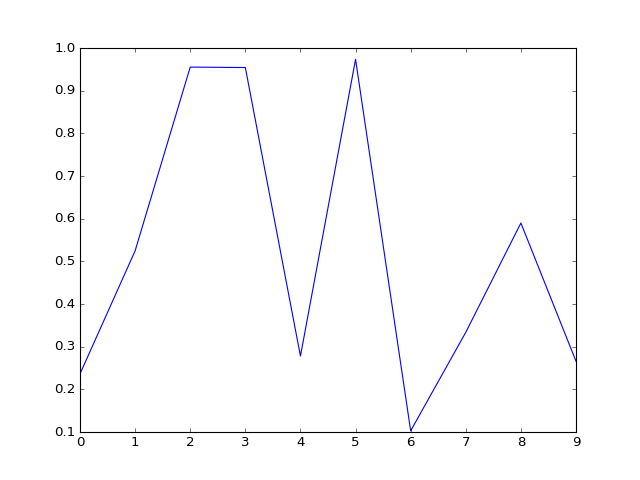

In [6]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
def onclick(event):
    print('button={}, x={}, y={}, xdata={}, ydata={}'.format(
            event.button, event.x, event.y, event.xdata, event.ydata))
    Beep(2000, 500)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [20]:
%%javascript
var cell = Jupyter.notebook.get_selected_cell();
// var cell_type = Jupyter.notebook.get_selected_cell().cell_type
// element.text(Jupyter.notebook.find_cell_index(cell))
element.text(cell_type)
var index = Jupyter.notebook.find_cell_index(cell)
var newcell = Jupyter.notebook.insert_cell_below('code', index)
element.text(newcell)

<IPython.core.display.Javascript object>

In [89]:
make_cell_below()